# NGC 4848

NGC 4848 (CGCG 160-055; Zwicky et al. 1961−1968) is
a bright (MB = −20.5) SBab:edge-on (RC3, de Vaucouleurs
et al. 1991) galaxy that lies at the northwest (N-W) periphery of
the X-ray emitting region in the Coma cluster. It has a vigorous star-formation rate (SFR) of ∼9 $M_\odot\, \text{yr}^{−1}$ as derived from the Hα, ultraviolet (UV), far-infrared (FIR), and radio-continuum emission.

In spite of its SBab classification, the morphology of NGC 4848
is rather irregular, being composed of a central nuclear source
(harboring an active galactic nucleus (AGN) [NII]λ6584 Å/Hα =
0.64, see Gavazzi et al. 2011) with red (g − i = 1.5 mag) color.
At a 5−10 arcsec projected radial distance from the nucleus, a
bright, blue, and clumpy ring of active HII regions dominates
the galaxy morphology. Further out, the light profile falls-oﬀ ex-
ponentially, as is typical of a disk

<img src="images/NGC4848.png" width="500"/>

In [1]:
from astropy.io import fits
import numpy as np

# Open the FITS file and load data
with fits.open("DATA/NGC_4848/NGC4848_cut.fits") as hdul:
    hdul.info()  # Shows a summary of the FITS file

    print('\n')
    header_0 = hdul[0].header
    for card in header_0.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")  
    
    print('\n')
    header_1 = hdul[1].header
    for card in header_1.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")

    print('\n')
    header_2 = hdul[2].header
    for card in header_2.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")
        
    # Load data
    cube = hdul[1].data 
    var = hdul[2].data 

# Generate the wavelength array
channels = np.arange(0, header_1['NAXIS3'], 1)
w = header_1['CRVAL3'] + channels * header_1['CD3_3']   # wavelength in angstrom

cube_units = 1e-20
var_units = 1e-40

naxis1, naxis2 = header_1['NAXIS1'], header_1['NAXIS2']
crpix1, crpix2 = header_1['CRPIX1'], header_1['CRPIX2']
crval1, crval2 = header_1['CRVAL1'], header_1['CRVAL2']
cdelt1, cdelt2 = header_1['CD1_1'], header_1['CD2_2']

# RA range
ra_min = crval1 + (1 - crpix1) * cdelt1
ra_max = crval1 + (naxis1 - crpix1) * cdelt1

# DEC range
dec_min = crval2 + (1 - crpix2) * cdelt2
dec_max = crval2 + (naxis2 - crpix2) * cdelt2

Filename: DATA/NGC_4848/NGC4848_cut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   ()      
  1  DATA          1 ImageHDU        40   (290, 395, 3400)   float32   
  2  STAT          1 ImageHDU        40   (290, 395, 3400)   float32   


SIMPLE   = True / conforms to FITS standard
BITPIX   = 8 / array data type
NAXIS    = 0 / number of array dimensions
EXTEND   = True / 
ORIGIN   = ESO-PARANAL / European Southern Observatory
TELESCOP = ESO-VLT-U4 / ESO <TEL>
INSTRUME = MUSE / Instrument used.
RA       = 194.523288 / [deg] 12:58:05.5 RA (J2000) pointing
DEC      = 28.23893 / [deg] 28:14:20.1 DEC (J2000) pointing
EQUINOX  = 2000.0 / Standard FK5
EXPTIME  = 1000.0 / Integration time
MJD-OBS  = 59648.23948721 / Obs start
DATE-OBS = 2022-03-10T05:44:51.695 / Observing date
PI-COI   = UNKNOWN / PI-COI name.
OBSERVER = UNKNOWN / Name of observer.
OBJECT   = NGC4848 / Original target.
ESO INS DROT POSANG = 345.5 / [deg] Derotator po

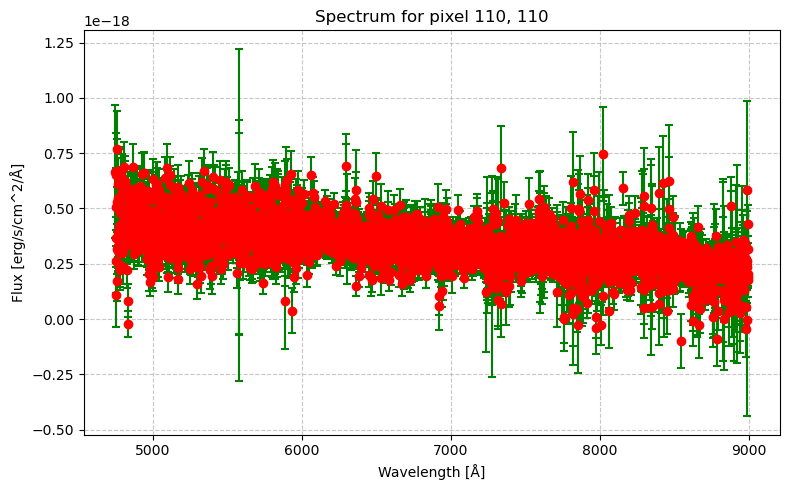

In [2]:
import matplotlib.pyplot as plt

x = 110
y = 110

# Plotting with improved styling
plt.figure(figsize=(8, 5))
plt.errorbar(w, cube[:, x, y]*cube_units, yerr=np.sqrt(var[:, x, y]*var_units), fmt='o', color='red', ecolor='green', elinewidth=1.5, capsize=3, capthick=1.5)

plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux [erg/s/cm^2/Å]")
plt.title(f"Spectrum for pixel {x:.0f}, {y:.0f}")
#plt.xlim(7000, 7100)  # Optional zoom-in


plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [3]:
# spectra adding all spatial pixels

summed_spectra = np.nansum(cube, axis=(1, 2))


In [4]:
summed_var = np.nansum(var, axis=(1,2))

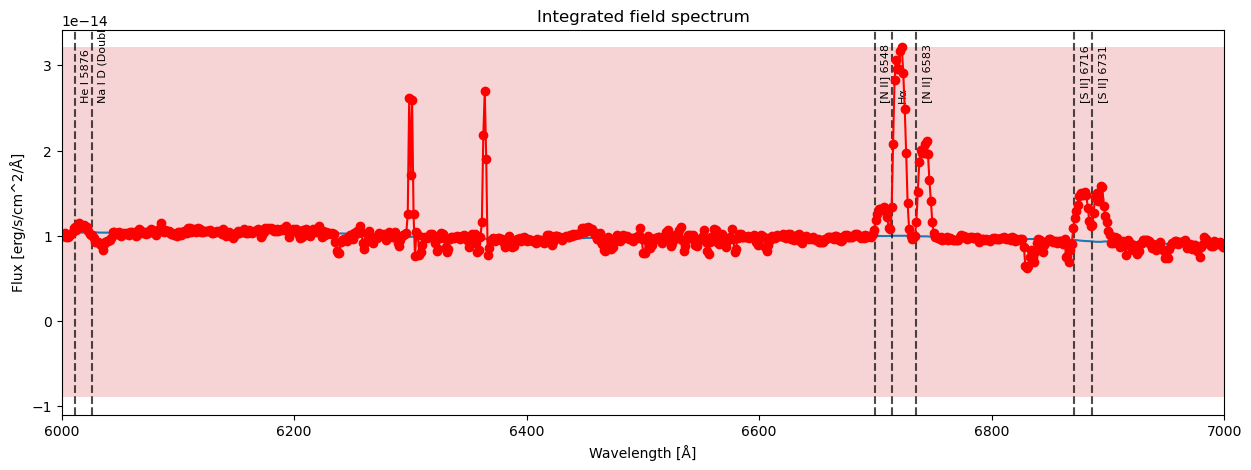

In [5]:
fig,ax = plt.subplots(figsize=(15,5))
plt.title("Integrated field spectrum")

plt.errorbar(w, summed_spectra*cube_units, yerr=np.sqrt(summed_var*var_units), fmt='o', color='red', ecolor='green', elinewidth=1.5, capsize=3, capthick=1.5,linestyle='-')

from scipy.ndimage import median_filter
continuum = median_filter(summed_spectra, size=101,mode="nearest")  # Choose an odd kernel size
plt.plot(w,continuum*cube_units)

plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux [erg/s/cm^2/Å]")

# Define UBVRI filter wavelength ranges (in Angstrom)
filters = {
    "U": (3200, 4000),
    "B": (4000, 5000),
    "V": (5000, 6000),
    "R": (6000, 7000),
    "I": (7000, 9000),
}

min = np.min(summed_spectra*cube_units)
max = np.max(summed_spectra*cube_units)
# Add vertical shaded regions corresponding to the filters
for name, (wmin, wmax) in filters.items():
    plt.fill_betweenx([min, max], wmin, wmax, alpha=0.2, label=f"{name} filter")
    
z_Coma = 0.0231

# Define important emission/absorption lines in galaxies
# Define important emission/absorption lines in galaxies
spectral_lines = {
    # Optical Lines
    "O II (Doublet)": 3727,
    "Hγ": 4340,
    "Hδ": 4102,
    "Hβ": 4861,
    "[O III] 4959": 4959,
    "[O III] 5007": 5007,
    "He II 4686": 4686,
    "He I 4471": 4471,
    "He I 5876": 5876,
    "Hα": 6563,
    "[N II] 6548": 6548,
    "[N II] 6583": 6583,
    "[S II] 6716": 6716,
    "[S II] 6731": 6731,
    "[Ar III] 7136": 7136,
    "[Fe II] 5159": 5159,

    # Calcium Lines
    "[Ca II] 8498": 8498,
    "[Ca II] 8542": 8542,
    "[Ca II] 8662": 8662,
    "Ca H": 3968,
    "Ca K": 3934,

    # Magnesium and Sodium Lines
    "Mg I 5175": 5175,
    "Na I D (Doublet)": 5890,  # Doublet at 5890 and 5896 Å
}
# Apply redshift correction to each spectral line
redshifted_lines = {name: wavelength * (1 + z_Coma) for name, wavelength in spectral_lines.items()}

# Add vertical dashed lines for spectral features
for name, wavelength in redshifted_lines.items():
    plt.axvline(wavelength, color="black", linestyle="dashed", alpha=0.7)
    plt.text(wavelength + 5, max * 0.8, name, 
             rotation=90, verticalalignment="bottom", fontsize=8, zorder=1, clip_on=True)

#plt.xlim(4750.15,7500)
#plt.xlim(6850,6900)
plt.xlim(6000,7000)



plt.show()


In [6]:
crval3 = header_1['CRVAL3']
dw = header_1['CD3_3'] 
Ha_channel_inf = int((6700 - crval3)/dw)
Ha_channel_sup = int((6750 - crval3)/dw)
continuum_channel_inf = int((6645 - crval3)/dw)
continuum_channel_sup = int((6695 - crval3)/dw)

units = 1e-20 * 50 / ( cdelt1 * 3600 )**2   # integrating on wavelength, per arcsec^2

integrated_Ha_continuum = np.nansum(cube[Ha_channel_inf:Ha_channel_sup, :, :],axis=0) * units
integrated_continuum_near_Ha = np.nansum(cube[continuum_channel_inf:continuum_channel_sup, :, :], axis=0) * units

integrated_Ha = integrated_Ha_continuum - integrated_continuum_near_Ha


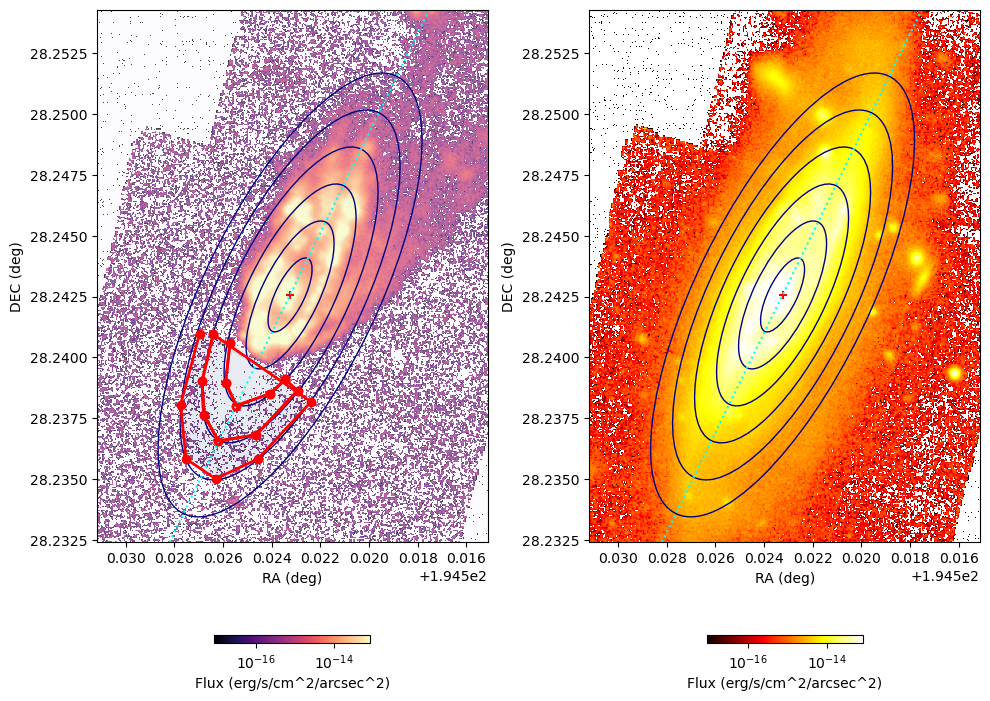

In [7]:
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse
import matplotlib.path as mpath

fig, ax = plt.subplots(1, 2, figsize=(10, 10))  # Adjust the size for better appearance
ax = ax.flatten()

# Define color normalization for logarithmic scaling
norm = LogNorm(np.nanquantile(integrated_Ha[integrated_Ha>0], 0.01), vmax=np.nanquantile(integrated_Ha, 0.99))

# Plotting the integrated Ha
cmap = plt.cm.magma
cmap.set_bad(color='white')
im0 = ax[0].imshow(integrated_Ha, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap=cmap, norm=norm)
ax[0].set_xlabel("RA (deg)")  # Label for X-axis
ax[0].set_ylabel("DEC (deg)")  # Label for Y-axis

# Plotting the integrated continuum near Ha
im1 = ax[1].imshow(integrated_continuum_near_Ha, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap='hot', norm=norm)
ax[1].set_xlabel("RA (deg)")  # Label for X-axis
ax[1].set_ylabel("DEC (deg)")  # Label for Y-axis

cbar0 = fig.colorbar(im0, ax=ax[0], location='bottom', shrink=0.4, pad = 0.1)
cbar1 = fig.colorbar(im1, ax=ax[1], location='bottom', shrink=0.4, pad = 0.1)

cbar0.set_label("Flux (erg/s/cm^2/arcsec^2)")  
cbar1.set_label("Flux (erg/s/cm^2/arcsec^2)")  

#####

center = (194.523241, 28.242570)  # Center of the galaxy (reference coordinates)
ax[0].scatter(center[0], center[1], marker='+', c='red')
ax[1].scatter(center[0], center[1], marker='+', c='red')

# Add ellipses
angle = - 64  # Angle of tilt in degrees

x = np.linspace(ra_min,ra_max)
m_semimajor_axis = np.tan(np.radians(angle))
y =  m_semimajor_axis * (x - center[0]) + center[1]
ax[0].plot(x,y,linestyle=':',c='cyan')
ax[1].plot(x,y,linestyle=':',c='cyan')

e = np.sqrt(1-(160/450)**2)
width = 30 * cdelt1
n = 7

# Create ellipses and add them to the plot
for i in range(1, n):
    a = width * i                # semimajor axis
    b = a * np.sqrt(1-e**2)   
    
    for k in range(2):
        ellipse = Ellipse(center, a*2, b*2, angle=angle, edgecolor='navy', facecolor='none')
        ax[k].add_patch(ellipse)
        #x_text = center[0] + a * np.cos(np.radians(angle)) - 5
        #y_text = m_semimajor_axis * (x_text - center[0]) + center[1]
        #ax[k].text(x_text,y_text, i, fontsize=15, zorder=1, clip_on=True,c='navy')





### Create a grid of points in RA/DEC space (using the extent)
# Create a grid of points in RA/DEC space using extent
ra_grid, dec_grid = np.meshgrid(np.linspace(ra_min, ra_max, naxis1), np.linspace(dec_min, dec_max, naxis2))

reg_1_vertices = np.array([(194.52571, 28.24059), (194.52589, 28.23897), (194.52545, 28.23802), (194.52407, 28.23851), (194.52344, 28.23910)])

reg_2_vertices = np.array([(194.52571, 28.24059), (194.52589, 28.23897), (194.52545, 28.23802), (194.52407, 28.23851), (194.52344, 28.23910), 
                           (194.52293,28.23864),(194.52463,28.23682), (194.52619,28.23657), (194.52677,28.23762),(194.52686,28.23902), (194.5264,28.24095)])

reg_3_vertices = np.array([(194.52293,28.23864),(194.52463,28.23682), (194.52619,28.23657), (194.52677,28.23762),(194.52686,28.23902), (194.5264,28.24095),
                          (194.52238,28.23818), (194.52457,28.23583), (194.52630,28.23501), (194.52752,28.23583), (194.52774,28.23806), (194.52696,28.24098)
                          ])

# List of regions (can add more regions if needed)
reg_vertices = [reg_1_vertices, reg_2_vertices, reg_3_vertices]
reg_masks = []

for reg in reg_vertices: 
    # Create the polygon path in RA/DEC space
    polygon_path = mpath.Path(reg)

    # Create a mask by checking which grid points in RA/DEC are inside the polygon
    mask = polygon_path.contains_points(np.column_stack((ra_grid.flatten(), dec_grid.flatten()))).reshape((naxis2, naxis1))
    reg_masks.append(mask)
    
    # Plot the polygon and mask
    ax[0].plot(reg[:, 0], reg[:, 1], 'r-', lw=2)  # Plot the polygon
    ax[0].scatter(reg[:, 0], reg[:, 1], color='red')  # Polygon vertices
    ax[0].imshow(mask, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap='Blues', interpolation='none', alpha=0.1)

for k in range(2):
    ax[k].set_xlim(ra_min,ra_max)
    ax[k].set_ylim(dec_min,dec_max)
    #ax[k].set_xlim(194.5+0.03,194.5+0.022)
    #ax[k].set_ylim(28.235,28.243)
    #ax[k].grid()


# Adjusting layout to make it fit better
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the tight_layout to leave space for colorbars
plt.show()



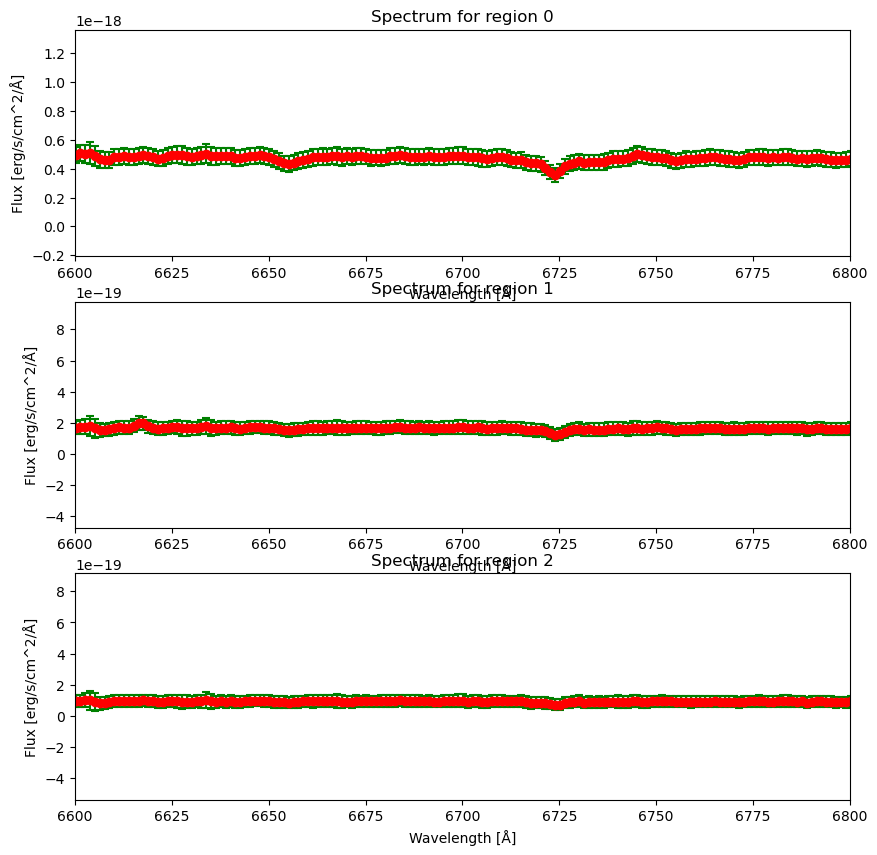

In [9]:
fig,ax= plt.subplots(3,1,figsize=(10,10))
ax = ax.flatten()

for i,mask in enumerate(reg_masks):
    n = len(mask[mask==True])
    # Sum the spectra for the region defined by the mask (sum over the spatial axes)
    spectra_region = np.nansum(cube[:, mask], axis=1) / n
    var_region = np.nansum(var[:, mask], axis=1) / n
    ax[i].errorbar(w, spectra_region * cube_units, yerr=np.sqrt(var_region * var_units), fmt='o', color='red', ecolor='green', elinewidth=1.5, capsize=3, capthick=1.5)

    ax[i].set_xlim(6600,6800)
    ax[i].set_xlabel("Wavelength [Å]")
    ax[i].set_ylabel("Flux [erg/s/cm^2/Å]")
    ax[i].set_title(f"Spectrum for region {i:.0f}")



In [9]:
# Import models 

with fits.open("../environment/Models_N4330_region1.fits") as modhdu:
    #hdul.info()
    #print(modhdu[0].header)

    Next = modhdu[0].header['NEXT'] 
    modwave = modhdu[0].data[0]
    
    models = []
    for ext in np.arange(1,Next+1):
        
        thishead = modhdu[ext].header
        modspec = modhdu[ext].data[0]
        
        Qtau = thishead['TRUNCTAU']
        Qage = thishead['TRUNCAGE']

        photarr = np.array((thishead['MODFUV'],thishead['MODNUV'],\
        thishead['MODU'],thishead['MODG'],\
        thishead['MODI'],thishead['MODZ'], \
        thishead['MODIR1'],thishead['MODIR4']))

        models.append({"spec":modspec,"Qtau":Qtau,"Qage":Qage,"photarr":photarr})


0.004449320412019233


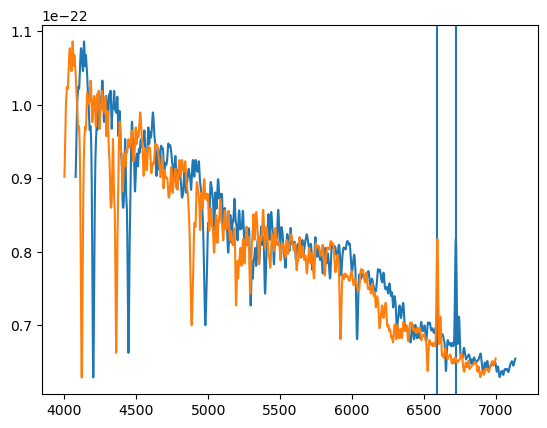

In [3]:
import matplotlib.pyplot as plt
#for i in np.arange(0,Next,20):
    #plt.plot(modwave,models[i]["spec"])
    #plt.plot(modwave,models[i]["spec"])

w_Ha = 6562.8
w_Ha_4848 = 6720
z_4848 = (w_Ha_4848 - w_Ha) / w_Ha

w_Ha_model = 6592 
z_model = (w_Ha_model - w_Ha) / w_Ha   # (0.005214, NGC 4330)
print(z_model)

plt.axvline(w_Ha_model)
plt.axvline(w_Ha_4848)

modwave_new = modwave - (z_model - z_4848) * modwave
plt.plot(modwave_new,models[0]["spec"])
plt.plot(modwave,models[0]["spec"])

#plt.xlim(6500,7000)

In [20]:

# Assuming `cube` has shape (n_wavelengths, y_size, x_size)

# Ensure the spatial dimensions are divisible by 4
y_size, x_size = cube.shape[1], cube.shape[2]
new_y_size, new_x_size = y_size // 4, x_size // 4

# Reshape the cube by summing the spectra in each 4x4 block
reshaped_cube = np.zeros((cube.shape[0], new_y_size, new_x_size))

for x in tqdm(range(new_x_size)):
    for y in range(new_y_size):
        # Sum the spectra in the 4x4 block at position (y, x)
        spectra_block = cube[:, y*4:(y+1)*4, x*4:(x+1)*4]  # Extract the 4x4 block
        reshaped_cube[:, y, x] = np.sum(spectra_block, axis=(1, 2))  # Sum across y and x

# `reshaped_cube` now has the shape (n_wavelengths, new_y_size, new_x_size)


100%|███████████████████████████████████████████| 72/72 [05:57<00:00,  4.97s/it]


In [23]:
print(reshaped_cube.shape)
print(Q_tau.shape)

(3400, 98, 72)
(98, 72)


In [26]:
spatial_shape = reshaped_cube.shape[1:]  # (y_size, x_size)
Q_tau = np.zeros(spatial_shape)
Q_age = np.zeros(spatial_shape)

# Pre-interpolate model spectra to match the wavelength grid
model_specs_interp = []
for model in models:
    interp_model = interp1d(modwave_new, model['spec'], kind='linear', bounds_error=False, fill_value=0)
    model_specs_interp.append(interp_model(w))
model_specs_interp_norm = np.array(model_specs_interp) / np.mean(model_specs_interp)  # Shape: (n_models, n_channels)

# Process the new 4x4 blocks of pixels
for x in tqdm(range(Q_tau.shape[1])):  # Loop over X-axis (columns)
    for y in range(Q_tau.shape[0]):  # Loop over Y-axis (rows)
        
        # Extract spectrum for the 4x4 pixel region
        spectrum = reshaped_cube[:, y, x]  # (n_channels,)
        error = reshaped_cube[:, y, x] / 10  # (n_channels,) -- assuming error scaling factor

        # Normalize the summed spectrum and error
        spectrum_norm = spectrum / np.mean(spectrum)  # (n_channels,)
        error_norm = error / np.mean(spectrum)  # (n_channels,)

        # Compute chi-square for all models using broadcasting
        # Expand spectrum_norm to shape (n_models, n_channels) for broadcasting
        spectrum_norm_expanded = np.tile(spectrum_norm, (model_specs_interp_norm.shape[0], 1))  # (n_models, n_channels)

        chi2_spec = np.nansum(((model_specs_interp_norm - spectrum_norm_expanded) ** 2) / (error_norm**2), axis=1)  # (n_models,)

        # Get the best-fit model index
        i = np.argmin(chi2_spec)

        # Fill Q_tau and Q_age with the best model parameters for the 4x4 region
        Q_tau[y, x] = models[i]['Qtau']
        Q_age[y, x] = models[i]['Qage']

100%|███████████████████████████████████████████| 72/72 [00:22<00:00,  3.18it/s]


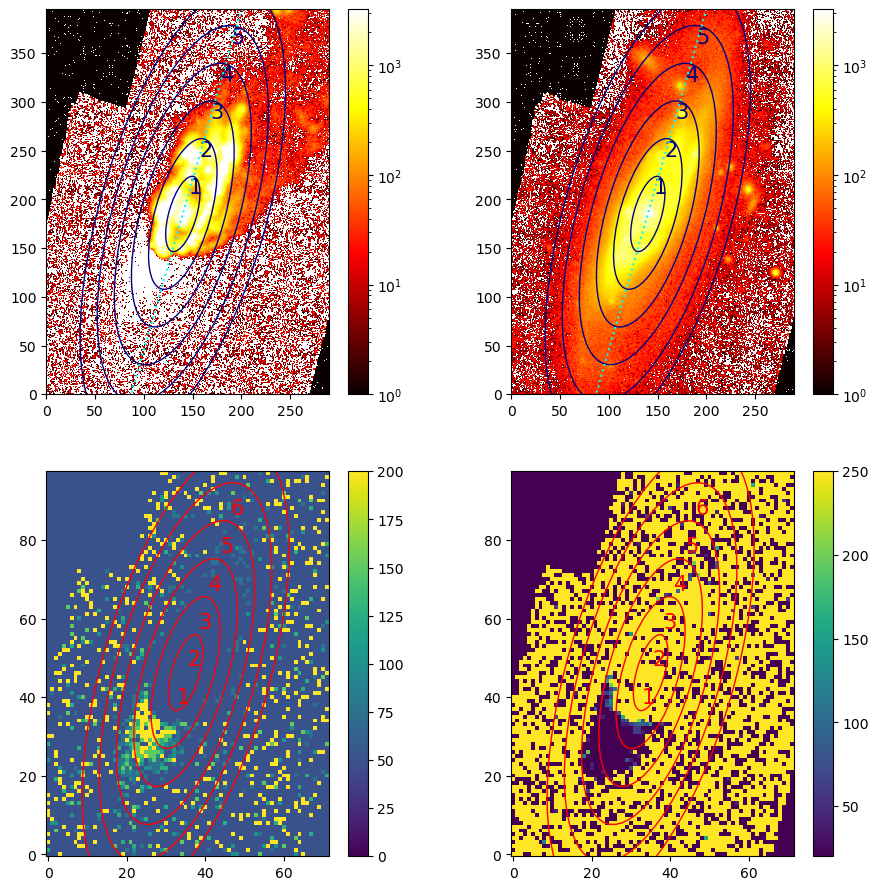

In [38]:
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(2, 2, figsize=(11, 11))
ax = ax.flatten()

# Define color normalization for logarithmic scaling
norm = LogNorm(vmin=1e-0, vmax=np.nanquantile(integrated_Ha, 0.99))

cmap = plt.cm.hot
cmap.set_bad(color='green')
im0 = ax[0].imshow(integrated_Ha, origin='lower', cmap='hot', norm=norm)
im1 = ax[1].imshow(integrated_continuum_near_Ha, origin='lower', cmap='hot',norm=norm)

fig.colorbar(im0, ax=ax[0], orientation='vertical')
fig.colorbar(im1, ax=ax[1], orientation='vertical')


im2 = ax[2].imshow(Q_age, origin='lower', cmap='viridis',vmin=0,vmax=200) #clim=[0,np.nanquantile(integrated_Ha,0.99)]
im3 = ax[3].imshow(Q_tau, origin='lower', cmap='viridis')


fig.colorbar(im2, ax=ax[2], orientation='vertical')
fig.colorbar(im3, ax=ax[3], orientation='vertical')

# Add ellipses
center = (140, 185)  # Center of the ellipse (x, y)
angle = 64  # Angle of tilt in degrees

x = np.linspace(0,290)
m_semimajor_axis = np.tan(np.radians(angle))
y =  m_semimajor_axis * (x - center[0]) + center[1]
ax[0].plot(x,y,linestyle=':',c='cyan')
ax[1].plot(x,y,linestyle=':',c='cyan')

e = np.sqrt(1-(160/450)**2)
width = 40
n = 7
t = 16

# Create ellipses and add them to the plot
for i in range(1, n):
    a = width * i                # semimajor axis
    b = a * np.sqrt(1-e**2)   
    
    for k in range(2):
        ellipse = Ellipse(center, a*2, b*2, angle=angle, edgecolor='navy', facecolor='none')
        ax[k].add_patch(ellipse)
        x_text = center[0] + a * np.cos(np.radians(angle)) - 5
        y_text = m_semimajor_axis * (x_text - center[0]) + center[1]
        ax[k].text(x_text,y_text, i, fontsize=15, zorder=1, clip_on=True,c='navy')

# Create ellipses and add them to the plot
for i in range(1, n):
    center = (140/4, 185/4)
    a = width * i / 4                # semimajor axis
    b = a * np.sqrt(1-e**2)   
    for k in range(2,4):
        ellipse = Ellipse(center, a*2, b*2, angle=angle, edgecolor='red', facecolor='none')
        ax[k].add_patch(ellipse)
        x_text = center[0] + a * np.cos(np.radians(angle)) - 5
        y_text = m_semimajor_axis * (x_text - center[0]) + center[1]
        ax[k].text(x_text,y_text, i, fontsize=15, zorder=1, clip_on=True,c='red')

for k in range(2):
    ax[k].set_xlim(0,integrated_Ha.shape[1])
    ax[k].set_ylim(0,integrated_Ha.shape[0])


plt.show()

In [12]:
# S

SII_channel_inf = int((6875 - 4749.9 )/1.25)
SII_channel_sup = int((6885 - 4749.9 )/1.25)
continuum_channel_inf = int((6850 - 4749.9 )/1.25)
continuum_channel_sup = int((6860 - 4749.9 )/1.25)

integrated_SII_continuum = np.nansum(cube[Ha_channel_inf:Ha_channel_sup, :, :], axis=0) 
integrated_continuum_near_SII = np.nansum(cube[continuum_channel_inf:continuum_channel_sup, :, :], axis=0)

integrated_SII = integrated_SII_continuum - integrated_continuum_near_SII

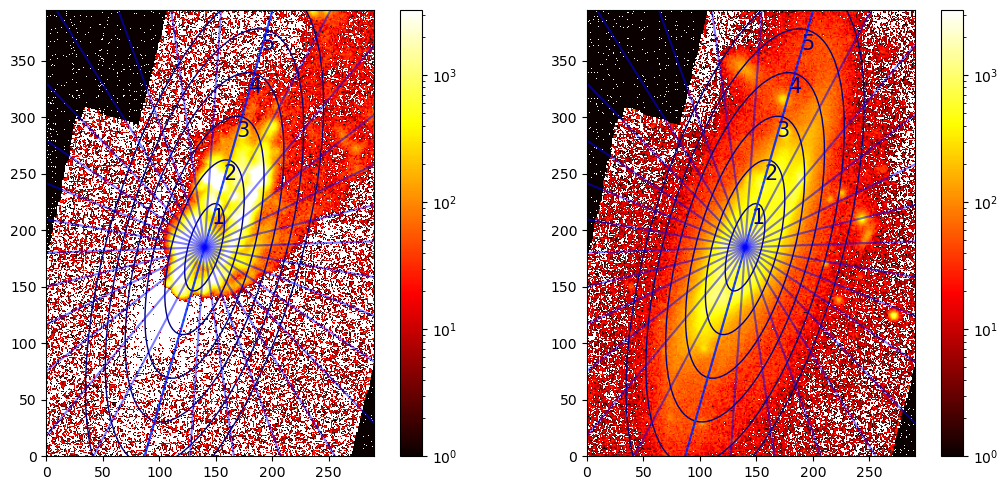

In [99]:
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse

# Assuming you have your data arrays defined (integrated_Ha, integrated_continuum_near_Ha, etc.)

fig, ax = plt.subplots(1, 2, figsize=(11, 5))
ax = ax.flatten()

# Define color normalization for logarithmic scaling
norm = LogNorm(vmin=1e-0, vmax=np.nanquantile(integrated_Ha, 0.99))
# Set NaN values to black

# Plotting the integrated Ha
cmap = plt.cm.hot
cmap.set_bad(color='green')
im0 = ax[0].imshow(integrated_Ha, origin='lower', cmap='hot',norm=norm) #clim=[0,np.nanquantile(integrated_Ha,0.99)]

im1 = ax[1].imshow(integrated_continuum_near_Ha, origin='lower', cmap='hot',norm=norm)
# Add colorbars
fig.colorbar(im0, ax=ax[0], orientation='vertical')
fig.colorbar(im1, ax=ax[1], orientation='vertical')
#fig.colorbar(im2, ax=ax[2], orientation='vertical')
#fig.colorbar(im3, ax=ax[3], orientation='vertical')

# Add ellipses
center = (140, 185)  # Center of the ellipse (x, y)
angle = 74  # Angle of tilt in degrees

x = np.linspace(0,290)
m_semimajor_axis = np.tan(np.radians(angle))
y =  m_semimajor_axis * (x - center[0]) + center[1]
ax[0].plot(x,y,linestyle=':',c='cyan')
ax[1].plot(x,y,linestyle=':',c='cyan')

e = np.sqrt(1-(160/450)**2)
width = 40
n = 7
t = 16

# Create ellipses and add them to the plot
for i in range(1, n):
    a = width * i                # semimajor axis
    b = a * np.sqrt(1-e**2)   
    
    for k in range(2):
        ellipse = Ellipse(center, a*2, b*2, angle=angle, edgecolor='navy', facecolor='none')
        ax[k].add_patch(ellipse)
        x_text = center[0] + a * np.cos(np.radians(angle)) - 5
        y_text = m_semimajor_axis * (x_text - center[0]) + center[1]
        ax[k].text(x_text,y_text, i, fontsize=15, zorder=1, clip_on=True,c='navy')

# devide ellipses in sub regions
angles = np.linspace(angle,360+angle, t)
for theta in angles:
    m_semimajor_axis = np.tan(np.radians(theta))
    y =  m_semimajor_axis * (x - center[0]) + center[1]
    ax[0].plot(x,y,c='blue',alpha=0.5)
    ax[1].plot(x,y,c='blue',alpha=0.5)



for k in range(2):
    ax[k].set_xlim(0,integrated_Ha.shape[1])
    ax[k].set_ylim(0,integrated_Ha.shape[0])


# Show the plot
plt.tight_layout()
plt.show()

In [106]:
angles = np.linspace(angle,360+angle, t)
print(angles)

[ 74.  98. 122. 146. 170. 194. 218. 242. 266. 290. 314. 338. 362. 386.
 410. 434.]


In [109]:
# Create the list of empty lists to store pixel coordinates
elliptical_regions = [[[] for i in range(t)] for i in range(n)]

# Loop through all pixels in V_map and check which ellipse they fall into
for x in range(integrated_Ha.shape[1]):  # Loop over X-axis (columns)
    for y in range(integrated_Ha.shape[0]):  # Loop over Y-axis (rows)

        # Transform (x, y) to the ellipse's coordinate system
        dx = (x - center[0]) * np.cos(np.radians(angle)) + (y - center[1]) * np.sin(np.radians(angle))
        dy = -(x - center[0]) * np.sin(np.radians(angle)) + (y - center[1]) * np.cos(np.radians(angle))

        # Check for each elliptical region
        for i in range(n):
            a_in = width * i 
            b_in = a_in * np.sqrt(1-e**2)
            a_out = width * (i + 1) 
            b_out = a_out * np.sqrt(1-e**2)

            # Check if the pixel is within the current elliptical region (but outside the next smaller one)
            if (dx**2 / a_out**2 + dy**2 / b_out**2) <= 1 and (dx**2 / a_in**2 + dy**2 / b_in**2) > 1:

                angles = np.linspace(angle,360+angle, t, endpoint=False)
                if x != center[0]: 
                    theta_point = np.degrees(np.arctan2(y - center[1],x - center[0]))
                    if theta_point < 0:
                        theta_point += 360
                    theta_point = (theta_point + angle) #% 360
                else: theta_point = angle
                k = np.digitize(theta_point,angles) - 1
                elliptical_regions[i][k].append([x, y])


/tmp/ipykernel_33043/2867119420.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  if (dx**2 / a_out**2 + dy**2 / b_out**2) <= 1 and (dx**2 / a_in**2 + dy**2 / b_in**2) > 1:
/tmp/ipykernel_33043/2867119420.py:20: RuntimeWarning: invalid value encountered in scalar divide
  if (dx**2 / a_out**2 + dy**2 / b_out**2) <= 1 and (dx**2 / a_in**2 + dy**2 / b_in**2) > 1:


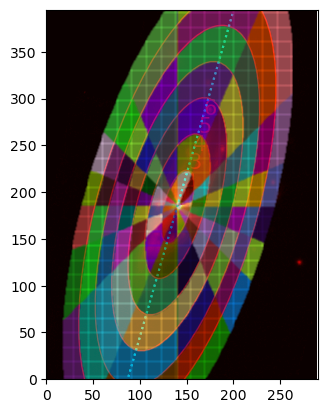

In [110]:
# TEST the ellipse region code

fig,ax = plt.subplots()

ax.imshow(integrated_continuum_near_Ha, origin='lower', cmap='hot', clim=[0, np.nanquantile(integrated_Ha, 0.99)])
ax.set_xlim(0,integrated_Ha.shape[1])
ax.set_ylim(0,integrated_Ha.shape[0])


# Add ellipses
center = (140, 185)         # Center of the ellipse (x, y)
angle = 74                  # Angle of tilt in degrees
e = np.sqrt(1-(160/450)**2) # eccentricity
width = 40

x = np.linspace(0,290)
m_semimajor_axis = np.tan(np.radians(angle))
y =  m_semimajor_axis * (x - center[0]) + center[1]
ax.plot(x,y,linestyle=':',c='cyan')
ax.plot(x,y,linestyle=':',c='cyan')


# Create ellipses and add them to the plot
for i in range(1, n):
    a = width * i
    b = a * np.sqrt(1-e**2)

    ellipse = Ellipse(center, a*2, b*2, angle=angle, edgecolor='red', facecolor='none')
    ax.add_patch(ellipse)
    x_text = center[0] + a/2 * np.cos(np.radians(angle)) - 5
    y_text = m_semimajor_axis * (x_text - center[0]) + center[1]
    ax.text(x_text,y_text, i, fontsize=15, zorder=1, clip_on=True,c='red')

# color each of n regions

import random

for i in range(n):
    for j in range(t):
        selected_pixels = elliptical_regions[i][j]

        colors = []
        for _ in range(n):
            colors.append((random.random(), random.random(), random.random())) # Generate a random color in RGB format
        
        for pixel in selected_pixels:
            plt.plot(pixel[0], pixel[1], marker='s', color=colors[i], markersize=1,alpha=0.1)


plt.show()

In [25]:
# Initialize a list to store the summed spectra for each elliptical region
summed_spectra_elliptical_regions = []

# Loop through each elliptical region
for i, region_coords in enumerate(elliptical_regions):
    # Create a mask for pixels within the current elliptical region
    mask = np.zeros((V_map.shape[0], V_map.shape[1]), dtype=bool)

    # Get the coordinates for the current elliptical region
    x_coords, y_coords = zip(*region_coords)

    # Set pixels within the elliptical region to True in the mask
    for x, y in zip(x_coords, y_coords):
        mask[y, x] = True  # Note the correct indexing (y, x)

    # Use the mask to select the corresponding pixels in the cube and sum the spectra
    region_spectrum = np.nansum(cube[:, mask], axis=1)  # Sum spectra for all masked pixels
    
    # Append the summed spectrum for the elliptical region
    summed_spectra_elliptical_regions.append(region_spectrum)


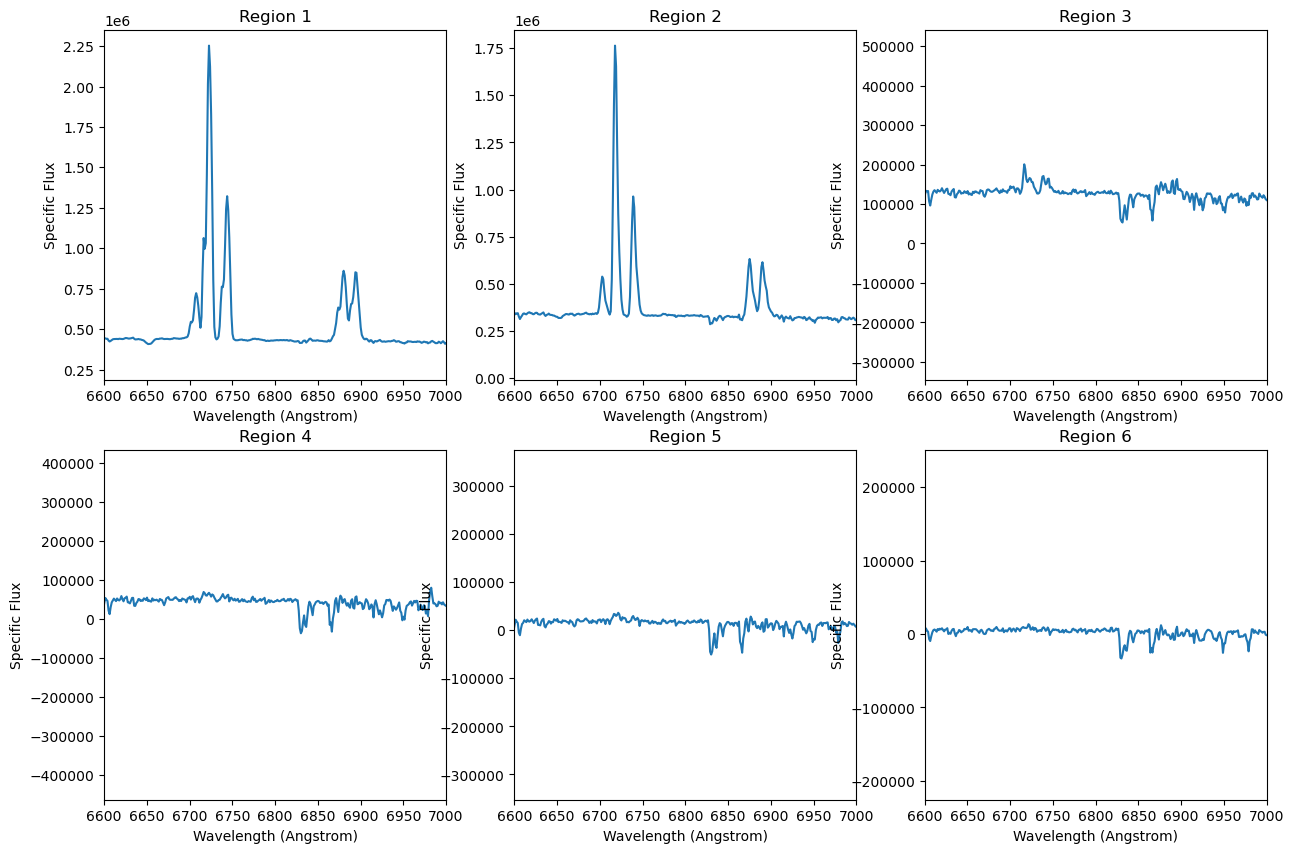

In [26]:
fig,ax = plt.subplots(2,3,figsize=(15,10))
ax = ax.flatten()

for i in range(6):
    ax[i].plot(w,summed_spectra_elliptical_regions[i])
    ax[i].set_xlim(6600,7000)
    ax[i].set_xlabel("Wavelength (Angstrom)")
    ax[i].set_ylabel("Specific Flux")
    ax[i].set_title(f"Region {i+1}")

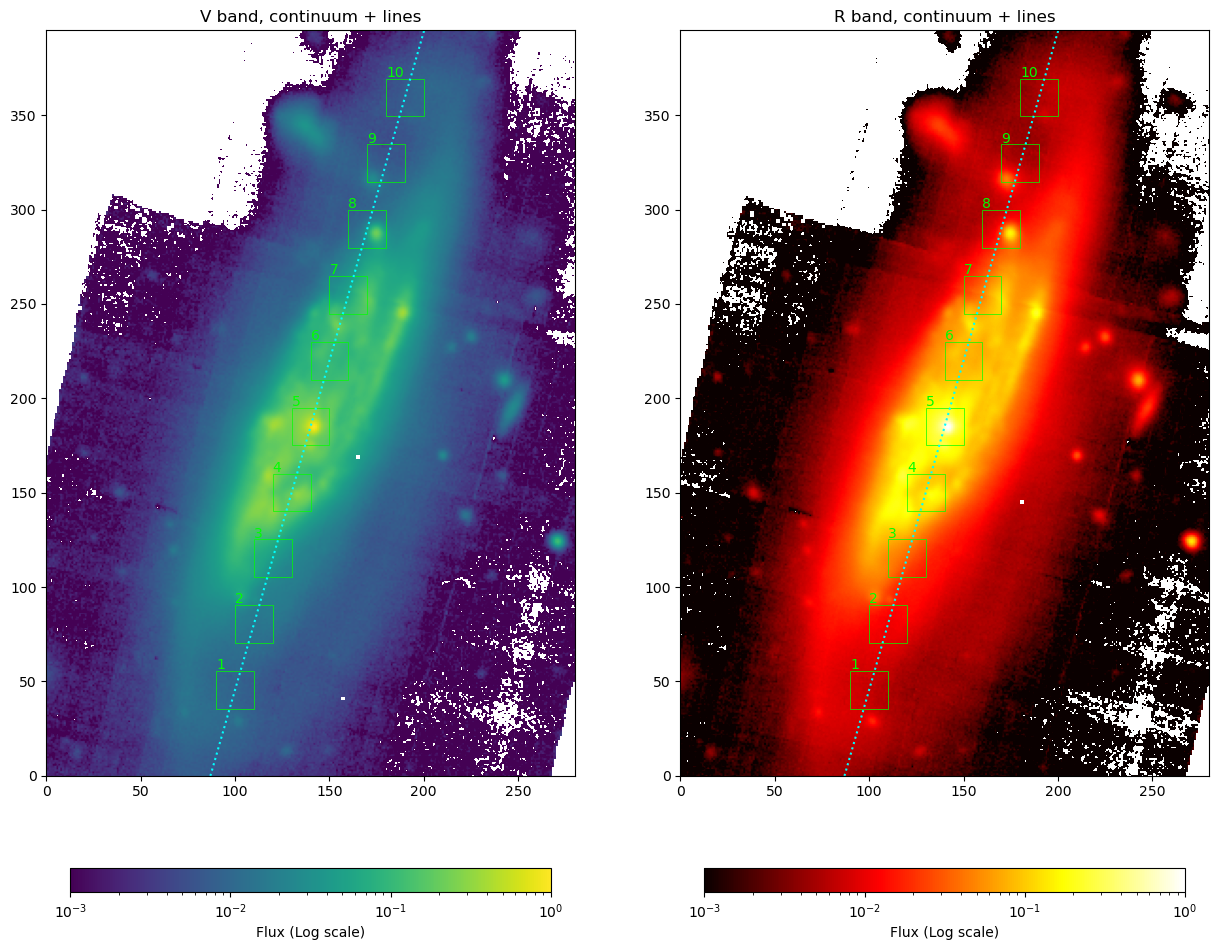

In [34]:
fig, ax = plt.subplots(1,2,figsize=(15,12))

ax[0].set_title("V band, continuum + lines")
im1 = ax[0].imshow(V_map_continuum/np.nanmax(V_map_continuum), origin='lower', cmap='viridis', norm=LogNorm(1e-3,1))
fig.colorbar(im1, ax=ax[0], orientation='horizontal', label='Flux (Log scale)', pad=0.1, fraction=0.026)

ax[1].set_title("R band, continuum + lines")
im2 = ax[1].imshow(R_map_continuum/np.nanmax(R_map_continuum), origin='lower', cmap='hot', norm=LogNorm(1e-3,1))
fig.colorbar(im2, ax=ax[1], orientation='horizontal', label='Flux (Log scale)', pad=0.1, fraction=0.026)

x = np.linspace(0,290)
m_semimajor_axis = np.tan(np.radians(angle))
y =  m_semimajor_axis * (x - center[0]) + center[1]
ax[0].plot(x,y,c='cyan',linestyle=':')
ax[1].plot(x,y,c='cyan',linestyle=':')

squares = []
for i,x in enumerate(np.arange(100,200,10)):
    y =  m_semimajor_axis * (x - center[0]) + center[1]
    squares.append([x,y])
    for j in range(2):
        square = plt.Rectangle((x-10, y-10), 20, 20, fill=False, linewidth=0.5,color='lime')
        ax[j].add_patch(square)
        ax[j].text(x-10,y+11,i+1,c='lime')
        ax[j].set(xlim=(0,280),ylim=(0,395))


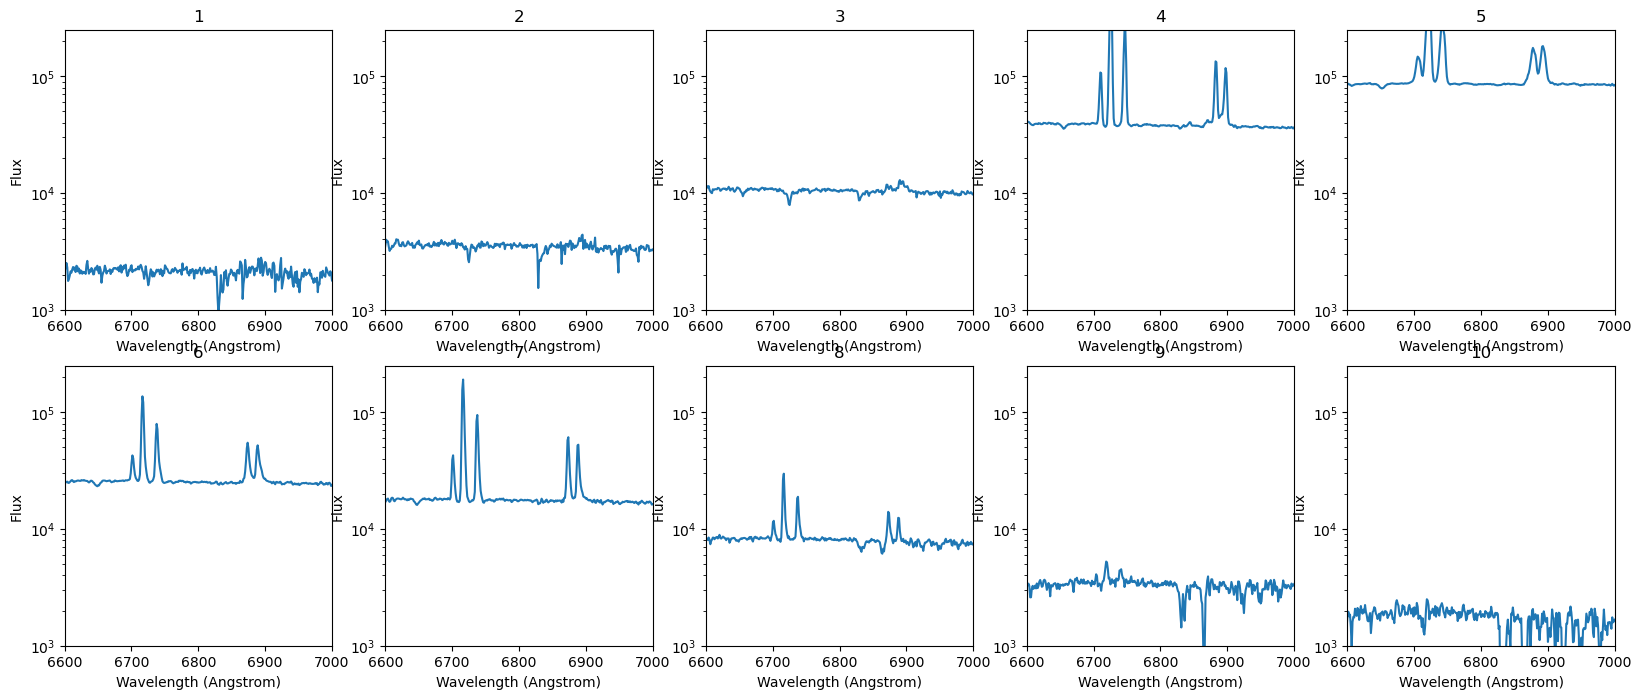

In [36]:
w = np.linspace(4750.15,8998.9,3400)

spectra = []
for p in squares:
    x, y = p[0], p[1]
    selected_pixels = cube[:,int(y-10):int(y+10),int(x-10):int(x+10)]
    summed_spectra = np.sum(selected_pixels, axis=(1, 2))
    spectra.append(summed_spectra)

fig, ax = plt.subplots(2,5,figsize=(20,8))
ax = ax.flatten()

for i in range(10):
    ax[i].plot(w, spectra[i])
    ax[i].set_title(i+1)
    ax[i].set_xlim(6600,7000)
    ax[i].set_ylim(1000,250000)
    ax[i].set_yscale("log")
    ax[i].set_xlabel("Wavelength (Angstrom)")
    ax[i].set_ylabel("Flux")



In [ ]:
# Annotate each vertex with its index
for i, (ra, dec) in enumerate(reg_2_vertices):
    ax[0].text(ra, dec, str(i), fontsize=12, color='blue', ha='right', va='bottom', c='red')
